In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
!ls /Users/dongmeichen/Documents/All/learning/machine_learning/machine-learning-ex1/ex1

computeCost.m           featureNormalize.m~     octave-workspace
computeCostMulti.m      gradientDescent.m       plotData.m
ex1.m                   gradientDescent.m~      submit.m
ex1_multi.m             gradientDescentMulti.m  token.mat
ex1data1.txt            gradientDescentMulti.m~ warmUpExercise.m
ex1data2.txt            lib
featureNormalize.m      normalEqn.m


In [3]:
DATA = '/Users/dongmeichen/Documents/All/learning/machine_learning/machine-learning-ex1/ex1'

In [4]:
!head -5 $DATA/ex1data1.txt

6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233


In [5]:
data = pd.read_csv(f'{DATA}/ex1data1.txt', header=None, names=['X', 'y'])
data.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
X = pd.DataFrame(data['X'])
y = data['y']

In [7]:
m = len(y)
m

97

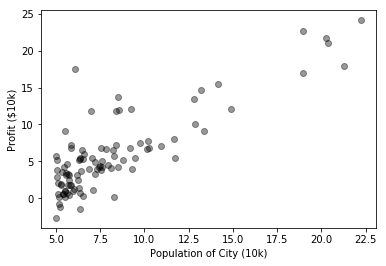

In [8]:
plt.plot(X, y, 'ko', alpha=0.4)
plt.xlabel('Population of City (10k)')
plt.ylabel('Profit ($10k)');

In [9]:
X['bias'] = 1
X = X[['bias', 'X']]
X.head()

,bias,X
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
theta = np.zeros((2, 1))
theta

array([[0.],
       [0.]])

In [11]:
def predict(X, theta):
    return (X.values @ theta).reshape(-1,)

In [12]:
def compute_cost(preds, y):
    m = len(y)
    return ((preds - y) ** 2).sum() / (2*m)

In [13]:
preds = predict(X, theta)
compute_cost(preds, y)

32.072733877455676

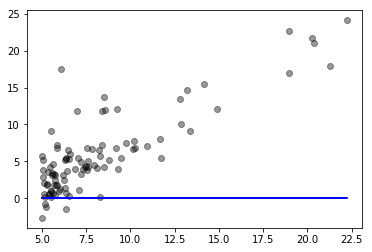

In [14]:
plt.plot(X['X'], y, 'ko', alpha=0.4)
plt.plot(X['X'], preds, 'b-');

In [15]:
def update(X, theta, preds, learning_rate=0.01):
    m = len(preds)
    theta = (
        theta - ((learning_rate / m) * ((preds - y) * X.T).sum(axis=1)).values.reshape(-1, 1))
    return theta

In [16]:
theta1 = update(X, theta, preds)
theta1

array([[0.05839135],
       [0.6532885 ]])

In [17]:
preds1 = predict(X, theta1)
compute_cost(preds1, y)

6.737190464870007

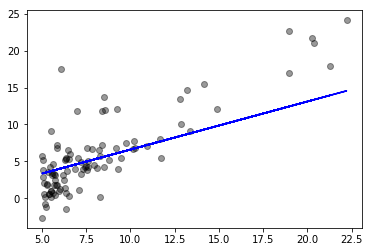

In [18]:
plt.plot(X['X'], y, 'ko', alpha=0.4)
plt.plot(X['X'], preds1, 'b-');

In [23]:
def optimize(X, y, learning_rate=0.01, max_iter=1500, plot=True):
    losses = []
    if plot:
        plt.plot(X['X'], y, 'ko', alpha=0.4)
    theta = np.zeros((2, 1))
    for i in range(max_iter):
        preds = predict(X, theta)
        cost = compute_cost(preds, y)
        losses.append(cost)
        if i % 50 == 0:
            print('cost:', cost)
        if plot:
            plt.plot(X['X'], preds, 'b-', alpha=0.2);
            if i == (max_iter - 1): # final solution
                plt.plot(X['X'], preds, 'r-');
        theta = update(X, theta, preds, learning_rate=learning_rate)
    return theta, losses

cost: 32.072733877455676
cost: 5.479648543830982
cost: 5.175697090896738
cost: 4.963885449960413
cost: 4.8162823679450595
cost: 4.713423668941915
cost: 4.641745545313584
cost: 4.591795920666658
cost: 4.556988020067781
cost: 4.53273178285548
cost: 4.515828578882344
cost: 4.504049410412945
cost: 4.495840977854773
cost: 4.4901208486931035
cost: 4.486134718893738
cost: 4.483356944069378
cost: 4.481421223617906
cost: 4.480072297263837
cost: 4.479132284305192
cost: 4.478477226777583
cost: 4.478020743321126
cost: 4.477702638212436
cost: 4.477480963453484
cost: 4.477326487158029
cost: 4.4772188387907965
cost: 4.477143822938471
cost: 4.477091547383859
cost: 4.477055118635463
cost: 4.477029732894088
cost: 4.477012042583727


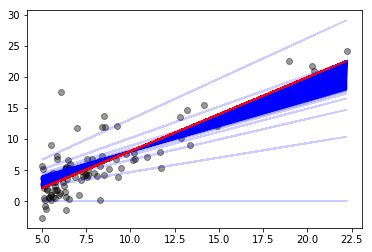

In [24]:
theta, history = optimize(X, y, learning_rate=0.02)

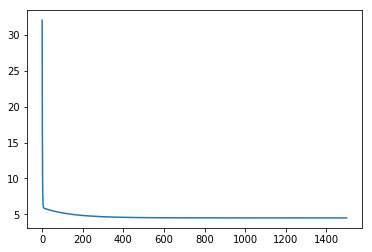

In [25]:
plt.plot(history);